# Clase 5 de noviembre 2021

In [51]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, transpile
from qiskit.tools.visualization import plot_state_city
from qiskit.tools.visualization import plot_histogram

import numpy as np
backend_ss = Aer.get_backend('statevector_simulator')
# backend_ss.configuration().basis_gates

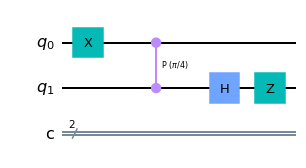

In [13]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cp(np.pi/4, 0, 1)
qc.h(1)
qc.z(1)
qc.draw('mpl')

Usar las compuertas nativas es mejor porque hay muchos artículos científicos donde Qiskit no se la puede y encuentran atajos para llegar a los resultados esperados. Teniéndolos presentes, se pueden encontrar tras decomponer.

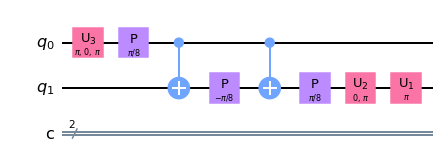

In [14]:
circ = qc.decompose() # shows the native gates
circ.draw('mpl')

In [15]:
print(qc.depth())
print(circ.depth())

4
8


In [17]:
job1 = backend_ss.run(qc)
result1 = job1.result()
statevector1 = result1.get_statevector()
print(statevector1)

[ 0.        +0.j  0.70710678+0.j -0.        +0.j -0.70710678+0.j]


Aquí se obtiene la parte real y la parte imaginaria del vector densidad.

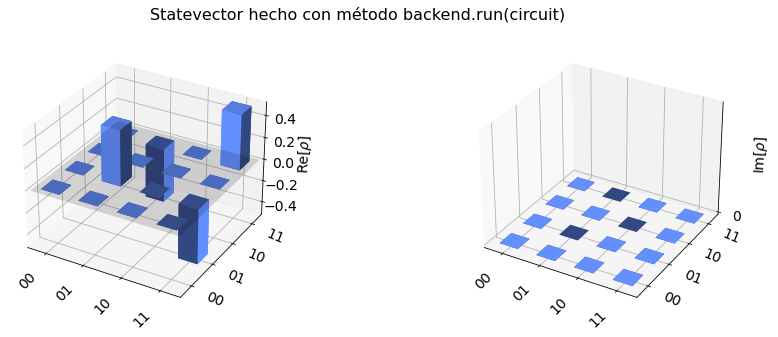

In [34]:
plot_state_city(statevector1, 'Statevector hecho con método backend.run(circuit)')

Al usar execute, le pasamos el backend. Por otro lado, run es un método del backend.

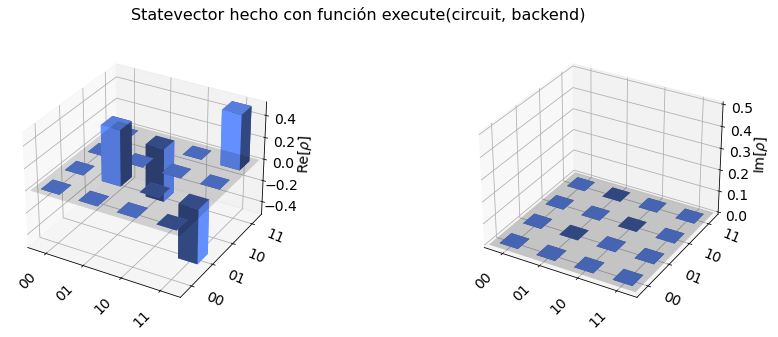

In [35]:
job2 = execute(qc, backend_ss)

result2 = job2.result()

statevector2 = result2.get_statevector()

plot_state_city(statevector2, 'Statevector hecho con función execute(circuit, backend)')

Concatenación de circuitos

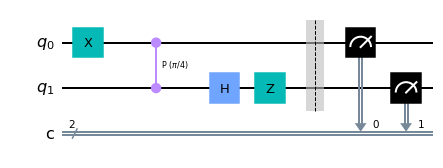

In [38]:
backend_qs = Aer.get_backend('qasm_simulator')
meas = QuantumCircuit(2,2)
meas.barrier()
meas.measure(range(2), range(2))
qc_meas = qc.compose(meas, front=False)
qc_meas.draw('mpl')

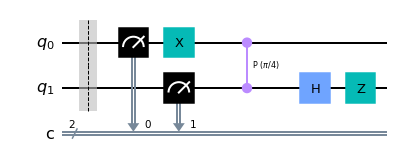

In [39]:
backend_qs = Aer.get_backend('qasm_simulator')
meas = QuantumCircuit(2,2)
meas.barrier()
meas.measure(range(2), range(2))
qc_meas_wrong = qc.compose(meas, front=True) # Wrong order
qc_meas_wrong.draw('mpl')

In [45]:
result3 = backend_qs.run(transpile(qc_meas), shots=2000).result()
counts = result3.get_counts()
print(counts)

{'01': 1002, '11': 998}


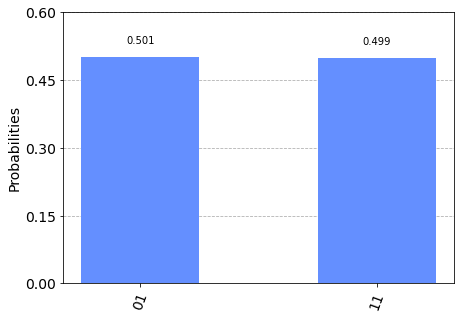

In [52]:
plot_histogram(counts)